In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data0 = np.loadtxt("/content/drive/My Drive/Colab Notebooks/day0.txt", delimiter=',')

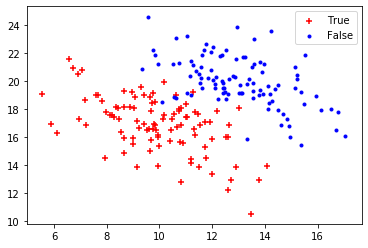

In [4]:
X0 = data0[:,:-1]
y0 = data0[:,-1]
plt.scatter(X0[y0 == 1,0], X0[y0 == 1,1], marker='+', c='r',label = 'True')
plt.scatter(X0[y0 == 0,0], X0[y0 == 0,1], marker='.', c='b',label = 'False')
plt.legend()

In [0]:
def train(X, y, l_rate):
    clf = SGDClassifier(loss='log', penalty=None, learning_rate='constant', eta0=l_rate)
    loss_list = []
    for i in range(50000):
        clf.partial_fit(X,y,classes = np.unique(y))
        result = clf.predict_proba(X)
        if (i%100)==0:
          loss_list.append(log_loss(y,result))
        pass
    return loss_list

l_rates = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

loss_lists = []
for l_rate in l_rates:
    loss_list = train(X0, y0, l_rate)
    loss_lists.append(loss_list) 

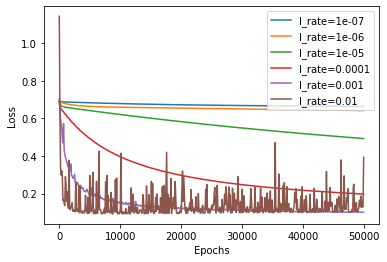

In [6]:
fig = plt.figure()
for i in range(len(loss_lists)):
    plt.plot(np.arange(0,50000,100), loss_lists[i], label='l_rate={}'.format(l_rates[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')

In [25]:
cls = SGDClassifier(loss='log', penalty= None, max_iter=50000, tol=None, learning_rate='constant', eta0=1e-3)
cls.fit(X0, y0)
b0 = cls.intercept_
b1 = cls.coef_[0][0]
b2 = cls.coef_[0][1]
x1 = np.linspace(5,25,num = 200)
x2 = (b0*(-1) - b1*x1)/b2
target = cls.score(X0, y0)
print('Train Accuracy in Day 0 is',target*100,'%')

Train Accuracy in Day 0 is 96.0 %


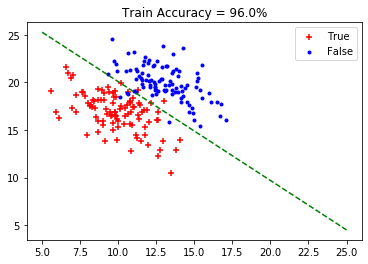

In [26]:
plt.title('Train Accuracy = {}%'.format(100*cls.score(X0, y0)))
plt.scatter(X0[y0 == 1,0], X0[y0 == 1,1], marker='+', c='r',label = 'True')
plt.scatter(X0[y0 == 0,0], X0[y0 == 0,1], marker='.', c='b',label = 'False')
plt.plot(x1, x2, color="g", linestyle="--", marker=None) 
plt.legend()

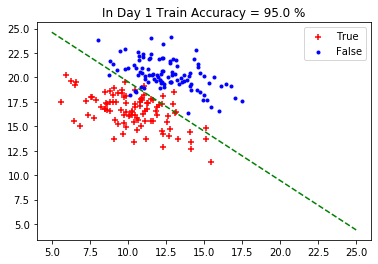

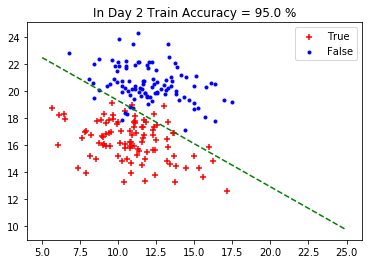

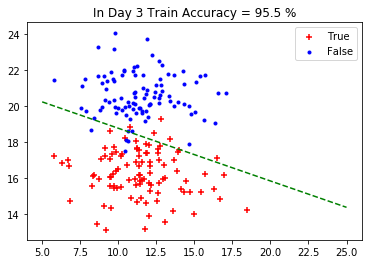

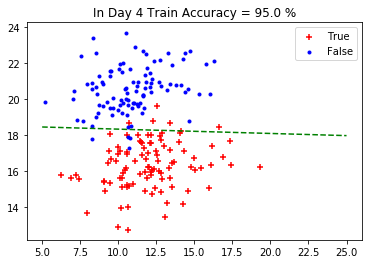

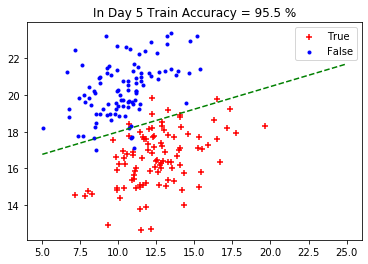

In [27]:
times = []
for i in range(1,6):
    data = np.loadtxt("/content/drive/My Drive/Colab Notebooks/day{}.txt".format(i), delimiter=',')
    X = data[:,:-1]
    y = data[:,-1]
    for k in range(1,100000):
        cls.partial_fit(X,y,classes = np.unique(y))
        if cls.score(X,y) >= 0.95:
            times.append(k)
            break
        else:
            continue 
    b0 = cls.intercept_
    b1 = cls.coef_[0][0]
    b2 = cls.coef_[0][1]
    x1 = np.linspace(5,25,num = 200)
    x2 = (b0*(-1) - b1*x1)/b2
    plt.figure()
    plt.title('In Day {} Train Accuracy = {} %'.format(i,100*cls.score(X, y)))
    plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r',label = 'True')
    plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b',label = 'False')
    plt.plot(x1, x2, color="g", linestyle="--", marker=None) 
    plt.legend()

In [28]:
times

[1, 11, 14, 18, 34]